### INSTALL DEPENDENCIS

In [1]:
!pip install spotipy
!pip install scikit-learn
!pip install statsmodels




 Import requirements

In [73]:
import pandas as pd
import sklearn
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr, spearmanr
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [4]:
client_id = "bc54923798704975b16cbe684b0766c9"
client_secret = "9e9a2e1ce2434454a0e7149d9b724461"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

print("Spotify API Authentication Successful!")

Spotify API Authentication Successful!


In [30]:
import requests
import base64

CLIENT_ID = "bc54923798704975b16cbe684b0766c9"
CLIENT_SECRET = "9e9a2e1ce2434454a0e7149d9b724461"

credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
encoded_credentials = base64.b64encode(credentials.encode()).decode()

url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {encoded_credentials}",
}
data = {
    "grant_type": "client_credentials",
}

response = requests.post(url, headers=headers, data=data)
if response.status_code == 200:
    print("Access Token:", response.json()["access_token"])
else:
    print("Error:", response.status_code, response.text)


Access Token: BQCsu-yA2sJ3UaPNulPLpHJL5L7MFPwlQ2HCff26gNoNLSS-fCW8z7-x0d-7kWiUn-s2lR2NanUaMlL6UOixXUhXwf8d9MwZyxPHtELgPAF0aKCDh64


In [46]:
import requests

# input the access token
access_token = "BQCsu-yA2sJ3UaPNulPLpHJL5L7MFPwlQ2HCff26gNoNLSS-fCW8z7-x0d-7kWiUn-s2lR2NanUaMlL6UOixXUhXwf8d9MwZyxPHtELgPAF0aKCDh64"


url = "https://api.spotify.com/v1/search"
headers = {
    "Authorization": f"Bearer {access_token}"
}
params = {
    "q": "Top Hits",  # Search keyword
    "type": "playlist",
    "limit": 35  # Limit results to 35 playlists
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    search_results = response.json()
    playlists = search_results.get("playlists", {}).get("items", [])
    
    # Print details of each playlist safely
    for playlist in playlists:
        # Skip if the playlist is None
        if playlist is None:
            continue

        playlist_name = playlist.get('name', 'N/A')
        playlist_id = playlist.get('id', 'N/A')
        
        owner = playlist.get('owner')
        owner_name = owner.get('display_name', 'Unknown Owner') if owner else 'Unknown Owner'
        
        print(f"Playlist Name: {playlist_name}")
        print(f"Playlist ID: {playlist_id}")
        print(f"Owner: {owner_name}")
        print("------")
else:
    print("Failed to search for playlists:", response.json())


Playlist Name: BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hits 🎵 
Playlist ID: 5KJDMJe9EJ7QRz8FG2MIpI
Owner: hotamazingnetwork
------
Playlist Name: Hits 2025 🔥 🔥  Aktuelle Charts und die besten Songs 2025 🔝 🙌
Playlist ID: 1CnDCN10TJZjw6K2H3gNRv
Owner: Filtr Germany
------
Playlist Name: HitRadio Ö3 2025 | TOP 40 [Wöchentlich Aktualisieren]
Playlist ID: 12IHbu3MlYODzZvJHqdjbr
Owner: Sounds of Someday | SOS
------
Playlist Name: OE3 Hits
Playlist ID: 3kCTvdDIMq1LzxKeJY4RQo
Owner: nina.grillenberger
------
Playlist Name: COUNTRY HITS 2025 🔥 New Country Songs + Top Hits
Playlist ID: 4Jb4PDWREzNnbZcOHPcZPy
Owner: Spot
------
Playlist Name: Mega Hits des Jahres 2024 🇦🇹 Austria 
Playlist ID: 5lZUKfSSxmMe7dtn4xzYvH
Owner: Digster Playlisten
------
Playlist Name: Schlager Hits 2025 - Die Top 100 Schlager Charts - Schlagerchampions 2025
Playlist ID: 0P745ihyc6DbSo66i7x3Dc
Owner: Heinz Glawischnig
------
Playlist Name: Ö3 Austria Top 40 | 4. Juni 2024
Playlist ID: 6UJ85c1TfmqUqwk42U6QJA
Owner: H

In [7]:
# Input the playlist_id( BEST HITS 2025)
playlist_id = "5KJDMJe9EJ7QRz8FG2MIpI"  
playlist_data = sp.playlist(playlist_id)

playlist_name = playlist_data["name"]
followers_count = playlist_data["followers"]["total"]

track_data = []


for i, track in enumerate(playlist_data["tracks"]["items"][:35]):
    track_name = track["track"]["name"]
    artist_name = track['track']["artists"][0]["name"]
    artist_id = track["track"]["artists"][0]["id"]
    release_date = track["track"]["album"]["release_date"]
    track_popularity = track["track"]["popularity"]

    track_data.append({
        "Track Number": i + 1,
        "Track Name": track_name,
        "Artist Name": artist_name,
        "Release Date": release_date,
        "Artist Id": artist_id,
        "Track Popularity": track_popularity,
        "Playlist Name": playlist_name,
        "Followers Count": followers_count
    })

    print(f"{i+1}. {track_name} by {artist_name}")
    print(f"   Released on: {release_date}")
    print(f"   Artist Id: {artist_id}")
    print(f"   Popularity: {track_popularity}")
    print(f"   Playlist Name: {playlist_name}")
    print(f"   Followers: {followers_count}\n")

df = pd.DataFrame(track_data)

# convert and print the DataFrame to a CSV file
df.to_csv("spotify_tracklist_data.csv", index=False)
print("Data successfully exported to 'spotify_tracklist_data.csv'.")


1. Die With A Smile by Lady Gaga
   Released on: 2024-08-16
   Artist Id: 1HY2Jd0NmPuamShAr6KMms
   Popularity: 99
   Playlist Name: BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hits 🎵 
   Followers: 345438

2. BIRDS OF A FEATHER by Billie Eilish
   Released on: 2024-05-17
   Artist Id: 6qqNVTkY8uBg9cP3Jd7DAH
   Popularity: 96
   Playlist Name: BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hits 🎵 
   Followers: 345438

3. Espresso by Sabrina Carpenter
   Released on: 2024-04-12
   Artist Id: 74KM79TiuVKeVCqs8QtB0B
   Popularity: 87
   Playlist Name: BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hits 🎵 
   Followers: 345438

4. As It Was by Harry Styles
   Released on: 2022-03-31
   Artist Id: 6KImCVD70vtIoJWnq6nGn3
   Popularity: 27
   Playlist Name: BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hits 🎵 
   Followers: 345438

5. Life by ConKi
   Released on: 2024-04-08
   Artist Id: 2oBcbbUQy8Md3FYXifyPTF
   Popularity: 67
   Playlist Name: BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hits 🎵 
   Fol

### STEP 2: FILTER AND CLEAN DATA

In [9]:
# Load the dataset
spotify_tracklist_file_path = pd.read_csv(r"C:\Users\43699\Downloads\spotify_tracklist_data.csv")

# Display the last few rows 
spotify_tracklist_file_path.tail(5)


,Track Number,Track Name,Artist Name,Release Date,Artist Id,Track Popularity,Playlist Name,Followers Count
30,31,Daylight,David Kushner,2023-04-14,33NVpKoXjItPwUJTMZIOiY,80,BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...,345438
31,32,Roaring 20s,DVNY,2024-09-26,6bZPyY7fpgegmdBHwbbu77,54,BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...,345438
32,33,I'm Good (Blue),David Guetta,2022-08-26,1Cs0zKBU1kc0i8ypK3B9ai,84,BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...,345438
33,34,Calm Down (with Selena Gomez),Rema,2022-08-25,46pWGuE3dSwY3bMMXGBvVS,78,BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...,345438
34,35,Glimpse of Us,Joji,2022-06-10,3MZsBdqDrRTJihTHQrO6Dq,54,BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...,345438


In [11]:
# Display basic column information names and data types 
df.info()
 
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track Number      35 non-null     int64 
 1   Track Name        35 non-null     object
 2   Artist Name       35 non-null     object
 3   Release Date      35 non-null     object
 4   Artist Id         35 non-null     object
 5   Track Popularity  35 non-null     int64 
 6   Playlist Name     35 non-null     object
 7   Followers Count   35 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 2.3+ KB


,Track Number,Track Popularity,Followers Count
count,35.000000,35.000000,35.0
mean,18.000000,70.285714,345438.0
std,10.246951,19.896159,0.0
min,1.000000,22.000000,345438.0
25%,9.500000,56.000000,345438.0
50%,18.000000,78.000000,345438.0
75%,26.500000,84.000000,345438.0
max,35.000000,99.000000,345438.0


In [13]:
# Check for missing figures  
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Track Number        0
Track Name          0
Artist Name         0
Release Date        0
Artist Id           0
Track Popularity    0
Playlist Name       0
Followers Count     0
dtype: int64


In [15]:
# print the column names in the DataFrame
print("Column Names in DataFrame:", df.columns)


Column Names in DataFrame: Index(['Track Number', 'Track Name', 'Artist Name', 'Release Date',
       'Artist Id', 'Track Popularity', 'Playlist Name', 'Followers Count'],
      dtype='object')


###  Data Analysis

In [17]:
# load dataset
spotify_tracklist = pd.read_csv(r"C:\Users\43699\Downloads\spotify_tracklist_data.csv")
print(spotify_tracklist.head())







   Track Number          Track Name        Artist Name Release Date  \
0             1    Die With A Smile          Lady Gaga   2024-08-16   
1             2  BIRDS OF A FEATHER      Billie Eilish   2024-05-17   
2             3            Espresso  Sabrina Carpenter   2024-04-12   
3             4           As It Was       Harry Styles   2022-03-31   
4             5                Life              ConKi   2024-04-08   

                Artist Id  Track Popularity  \
0  1HY2Jd0NmPuamShAr6KMms                99   
1  6qqNVTkY8uBg9cP3Jd7DAH                96   
2  74KM79TiuVKeVCqs8QtB0B                87   
3  6KImCVD70vtIoJWnq6nGn3                27   
4  2oBcbbUQy8Md3FYXifyPTF                67   

                                       Playlist Name  Followers Count  
0  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438  
1  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438  
2  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438  
3 

In [19]:
# Display basic column information names and data types 
df.info()

df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track Number      35 non-null     int64 
 1   Track Name        35 non-null     object
 2   Artist Name       35 non-null     object
 3   Release Date      35 non-null     object
 4   Artist Id         35 non-null     object
 5   Track Popularity  35 non-null     int64 
 6   Playlist Name     35 non-null     object
 7   Followers Count   35 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 2.3+ KB


,Track Number,Track Popularity,Followers Count
count,35.000000,35.000000,35.0
mean,18.000000,70.285714,345438.0
std,10.246951,19.896159,0.0
min,1.000000,22.000000,345438.0
25%,9.500000,56.000000,345438.0
50%,18.000000,78.000000,345438.0
75%,26.500000,84.000000,345438.0
max,35.000000,99.000000,345438.0


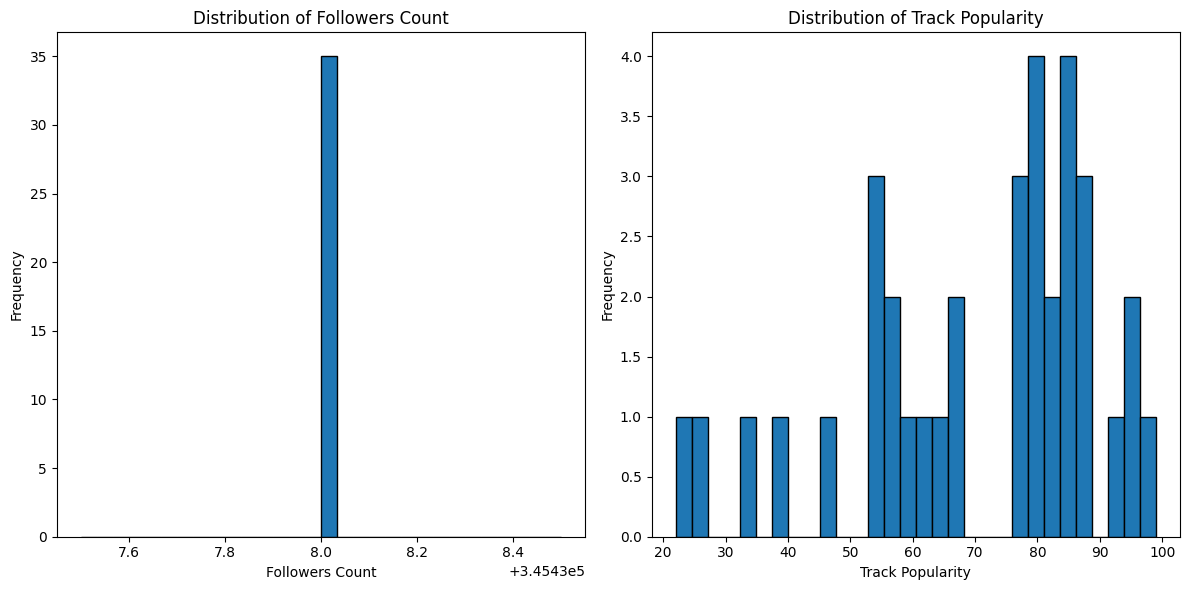

In [25]:
# using the numerical column create and plot the histogram distribution of followers count and track popularity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(spotify_tracklist["Followers Count"], bins=30, edgecolor="black")
plt.title("Distribution of Followers Count")
plt.xlabel("Followers Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(spotify_tracklist["Track Popularity"], bins=30, edgecolor="black")
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


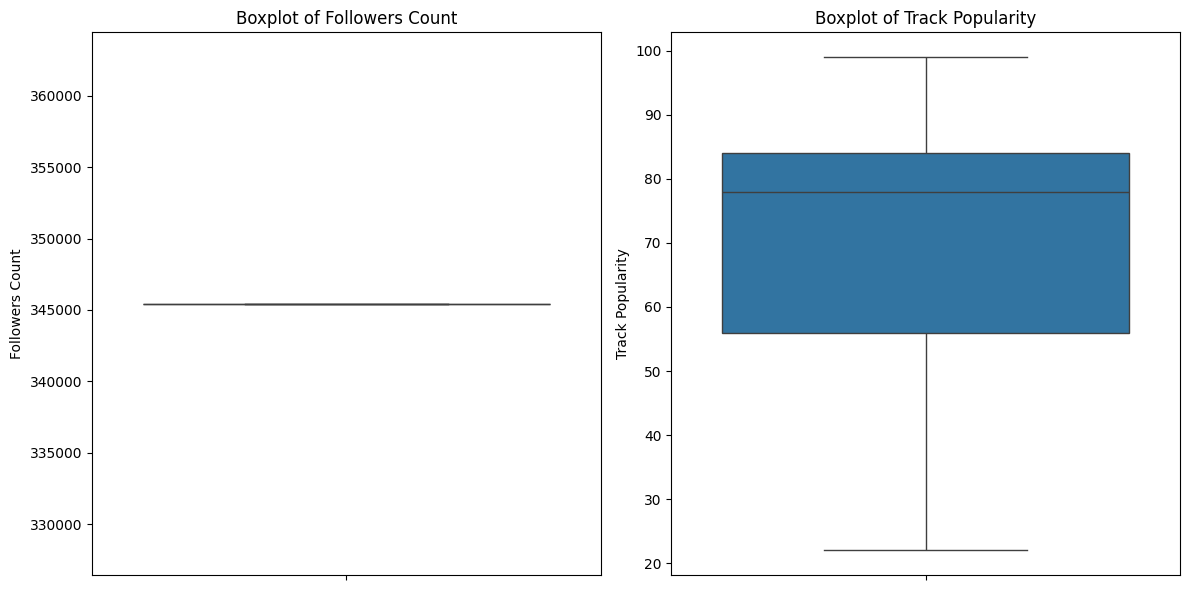

In [43]:
# using the numerical column create and display thebox plot  of followers count and track popularity 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=spotify_tracklist['Followers Count'])
plt.title('Boxplot of Followers Count')

plt.subplot(1, 2, 2)
sns.boxplot(y=spotify_tracklist['Track Popularity'])
plt.title('Boxplot of Track Popularity')

plt.tight_layout()
plt.show()


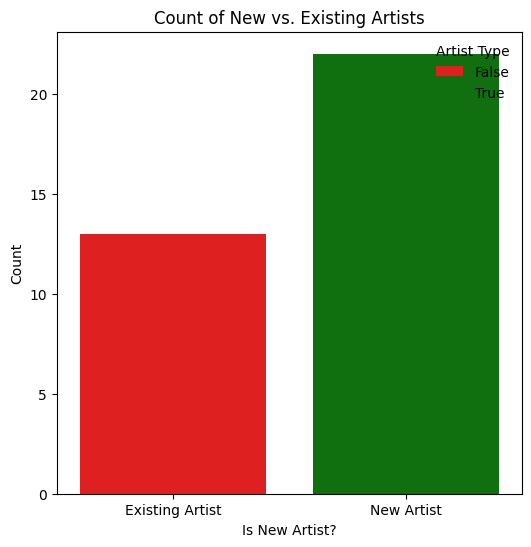

In [51]:
# convert the 'release date' to datetime format
spotify_tracklist["Release Date"] = pd.to_datetime(spotify_tracklist["Release Date"], errors='coerce')

#Create a new column for "is new artist" for the last two years 
spotify_tracklist["Is New Artist"] =spotify_tracklist["Release Date"] >= pd.Timestamp(datetime.now().year - 2, 1, 1)

new_artist_count =spotify_tracklist["Is New Artist"].value_counts()

# Create and display Bar plot for the count of new and existing artists 
plt.figure(figsize=(6, 6))
sns.barplot(x=new_artist_count.index, y=new_artist_count.values, hue=new_artist_count.index, palette=["red", "green"])
plt.title('Count of New vs. Existing Artists')
plt.xlabel('Is New Artist?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Existing Artist', 'New Artist'])
plt.legend(title='Artist Type', loc='upper right', frameon=False)  # Hide the legend if not needed
plt.show()


In [53]:
# Save the new dataset that contains 'Is New Artist' column and print
spotify_tracklist.to_csv(r"C:\Users\43699\Downloads\spotify_tracklist_with_new_artists.csv", index=False)

print("CSV file containing both new and existing artists successfully saved!")


CSV file containing both new and existing artists successfully saved!


In [55]:
# Load the new dataset 
data = pd.read_csv(r"C:\Users\43699\Downloads\spotify_tracklist_with_new_artists.csv")

# Display the first few rows and check the data types
print(data.head())
print(data.info())


   Track Number          Track Name        Artist Name Release Date  \
0             1    Die With A Smile          Lady Gaga   2024-08-16   
1             2  BIRDS OF A FEATHER      Billie Eilish   2024-05-17   
2             3            Espresso  Sabrina Carpenter   2024-04-12   
3             4           As It Was       Harry Styles   2022-03-31   
4             5                Life              ConKi   2024-04-08   

                Artist Id  Track Popularity  \
0  1HY2Jd0NmPuamShAr6KMms                99   
1  6qqNVTkY8uBg9cP3Jd7DAH                96   
2  74KM79TiuVKeVCqs8QtB0B                87   
3  6KImCVD70vtIoJWnq6nGn3                27   
4  2oBcbbUQy8Md3FYXifyPTF                67   

                                       Playlist Name  Followers Count  \
0  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438   
1  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438   
2  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438  

In [65]:
# Calculate to see new artist ratio per playlist 
data['new_artist_ratio'] = data.groupby('Playlist Name')['Is New Artist'].transform('sum') / data.groupby('Playlist Name')['Track Number'].transform('count')


print(data.head())


   Track Number          Track Name        Artist Name Release Date  \
0             1    Die With A Smile          Lady Gaga   2024-08-16   
1             2  BIRDS OF A FEATHER      Billie Eilish   2024-05-17   
2             3            Espresso  Sabrina Carpenter   2024-04-12   
3             4           As It Was       Harry Styles   2022-03-31   
4             5                Life              ConKi   2024-04-08   

                Artist Id  Track Popularity  \
0  1HY2Jd0NmPuamShAr6KMms                99   
1  6qqNVTkY8uBg9cP3Jd7DAH                96   
2  74KM79TiuVKeVCqs8QtB0B                87   
3  6KImCVD70vtIoJWnq6nGn3                27   
4  2oBcbbUQy8Md3FYXifyPTF                67   

                                       Playlist Name  Followers Count  \
0  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438   
1  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438   
2  BEST HITS 2025 🔥 Popular Songs 🎵 Top Music Hit...           345438  

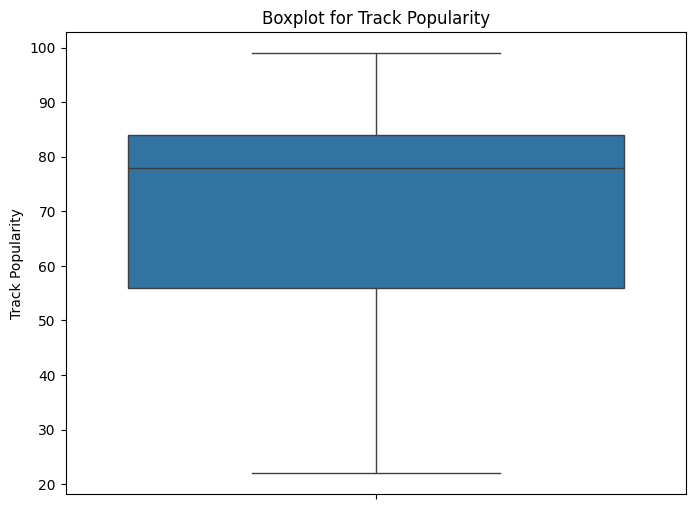

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Number      35 non-null     int64  
 1   Track Name        35 non-null     object 
 2   Artist Name       35 non-null     object 
 3   Release Date      35 non-null     object 
 4   Artist Id         35 non-null     object 
 5   Track Popularity  35 non-null     int64  
 6   Playlist Name     35 non-null     object 
 7   Followers Count   35 non-null     int64  
 8   Is New Artist     35 non-null     bool   
 9   new_artist_ratio  35 non-null     float64
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 2.6+ KB


In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data["Track Popularity"])
plt.title("Boxplot for Track Popularity")
plt.show()

Q1 = data["Track Popularity"].quantile(0.25)  # Calculate the first quartile
Q3 = data["Track Popularity"].quantile(0.75)  # Calculate the third quartile
IQR = Q3 - Q1  # Calculate the Interquartile Range

filtered_data = data[
    (data["Track Popularity"] >= Q1 - 1.5 * IQR) & 
    (data["Track Popularity"] <= Q3 + 1.5 * IQR)
]

filtered_data.info()


In [284]:
# Calculate and display Point-Biserial Correlation coeffiecient
corr_pointbiserial, p_value_pointbiserial = pointbiserialr(
    data["Track Popularity"], data["Is New Artist"]
)

print(f"Point-Biserial Correlation Coefficient: {corr_pointbiserial}")
print(f"P-value: {p_value_pointbiserial}")


Point-Biserial Correlation Coefficient: 0.05080923491542457
P-value: 0.7719217899190879


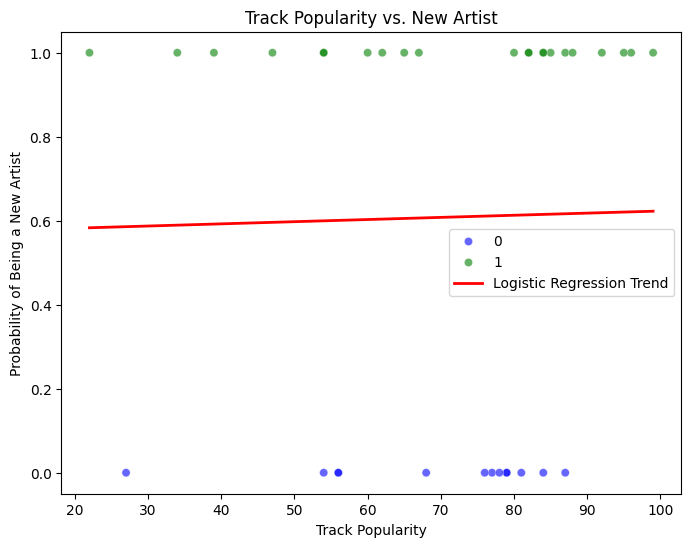

In [75]:
#create and display scatter plot wit logistics regression trend
data["Is New Artist"] = data["Is New Artist"].astype(int)

# variables
X = data[["Track Popularity"]]
y = data["Is New Artist"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

data["Probability_New_Artist"] = log_reg.predict_proba(X_scaled)[:, 1]

# Scatter plot with logistic regression trend line
plt.figure(figsize=(8, 6))

sns.scatterplot(x=data["Track Popularity"], y=data["Is New Artist"], 
                hue=data["Is New Artist"], palette={0: "blue", 1: "green"}, 
                alpha=0.6)
# Add logistic regression trend line
sns.lineplot(x=data["Track Popularity"], y=data["Probability_New_Artist"], 
             color="red", label="Logistic Regression Trend", linewidth=2)

plt.title("Track Popularity vs. New Artist")
plt.xlabel("Track Popularity")
plt.ylabel("Probability of Being a New Artist")
plt.legend()
plt.show()







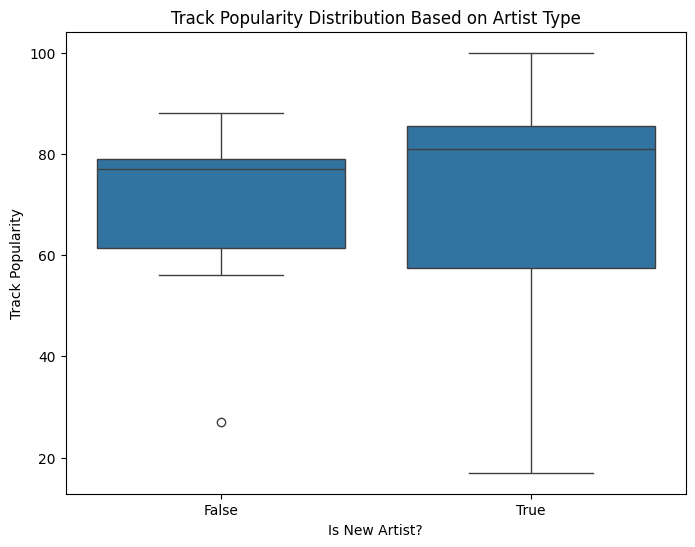

In [292]:
# Create and display the box plot base on artist type 
plt.figure(figsize=(8, 6))
sns.boxplot(x="Is New Artist", y="Track Popularity", data=data)
plt.title("Track Popularity Distribution Based on Artist Type")
plt.xlabel("Is New Artist?")
plt.ylabel("Track Popularity")
plt.show()




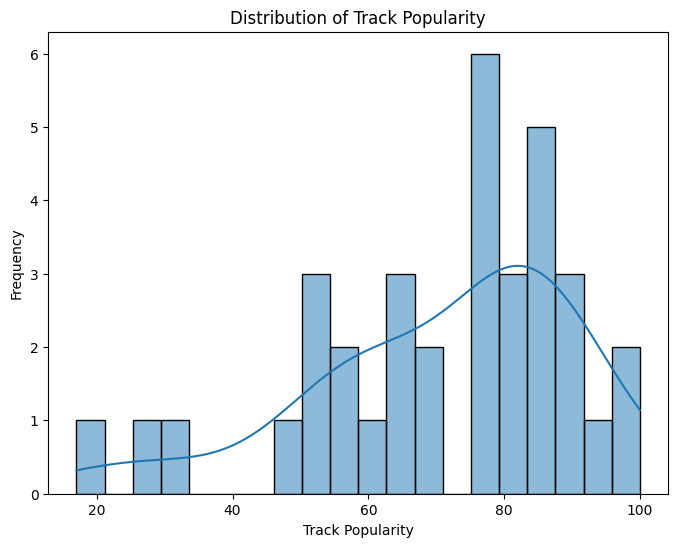

In [310]:
# Create and display the histogram to show the distribution of track popularity
plt.figure(figsize=(8, 6))
sns.histplot(data["Track Popularity"], bins=20, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Frequency")
plt.show()
